C:\Users\user\AppData\Local\Temp\ipykernel_12060\3108102903.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].mean(), inplace=True)


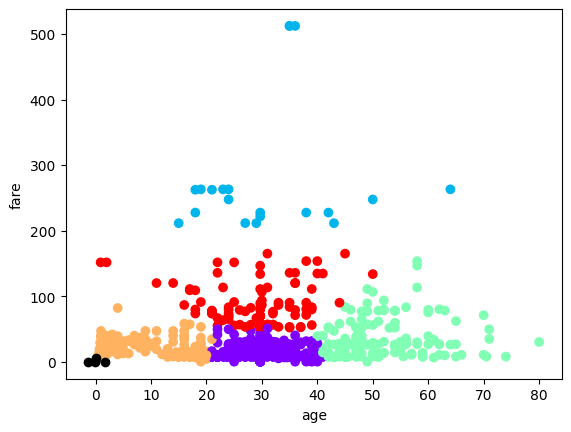

C:\Users\user\AppData\Local\Temp\ipykernel_12060\3108102903.py:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


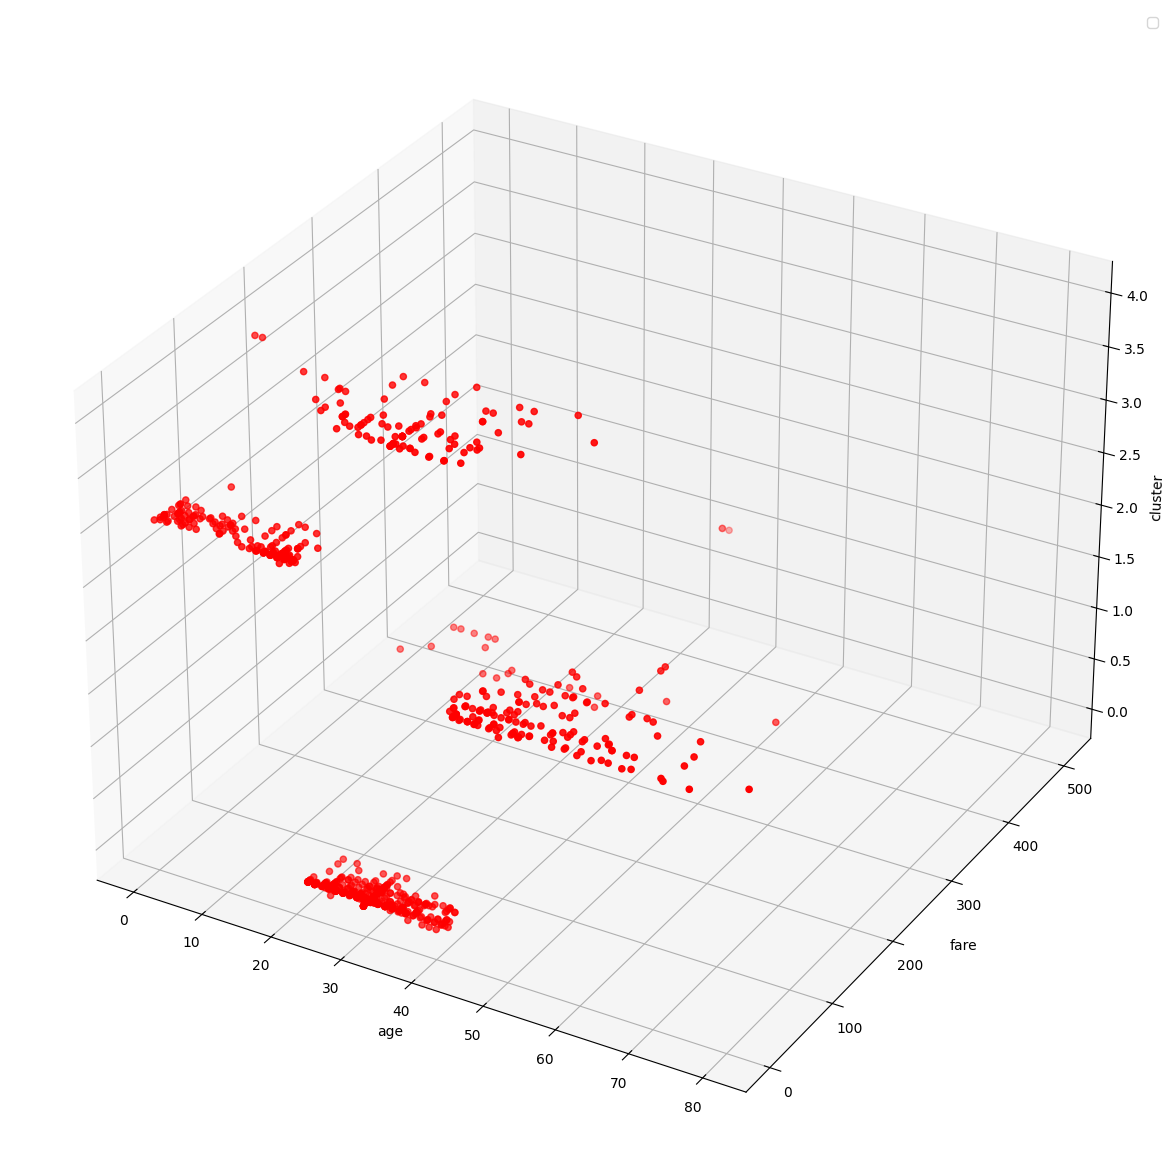

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    confusion_matrix,
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# import data
df = sns.load_dataset("titanic")

# deal with missing values
df["age"].fillna(df["age"].mean(), inplace=True)

# import model
from sklearn.cluster import KMeans

# import for normalization
from sklearn.preprocessing import StandardScaler

# import the data in features (normalizing the data)
x = df[["age", "fare"]]

# scaled data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# model the data

kmeans = KMeans(n_clusters=5)

# fit the model
kmeans.fit(x_scaled)

# assign the cluster labels to the data
df["cluster"] = kmeans.labels_

# plotting the graph
plt.scatter(df["age"], df["fare"], c=df["cluster"], cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="black")
# for cluster centers ie. the centroid of each cluster
plt.xlabel("age")
plt.ylabel("fare")
plt.show()


# 3D scatter plot
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection="3d")

# Scatter actual values
ax.scatter(df["age"], df["fare"], df["cluster"], color="red")


# Labels and legend
ax.set_xlabel("age")
ax.set_ylabel("fare")
ax.set_zlabel("cluster")
ax.legend()

plt.show()


import plotly.express as px

fig = px.scatter(df, x="age", y="fare", color="cluster")
fig.show()


import plotly.express as px

fig = px.scatter_3d(df, x="age", y="fare", z="survived", color="cluster")
fig.show()


import plotly.express as px

fig = px.parallel_coordinates(
    df,
    color="cluster",
    color_continuous_scale=px.colors.sequential.Inferno,
    title="Titnaic",
)
fig.show()

In [ ]:
# saving the model
import joblib

joblib.dump(kmeans, "KMEANClustring.joblib")

['KMEANClustring.joblib']

In [ ]:
# loading the saved model

import joblib

model_loaded = joblib.load("KMEANClustring.joblib")

In [4]:
model_loaded

KMeans(n_clusters=5)

# Using the saved model in a new project

In [ ]:
# import dataset

df1 = sns.load_dataset("tips")
df1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# assigning 0 and 1 to the categorical variables

# a = pd.get_dummies(a, columns=['smoker'])
# a = pd.get_dummies(a, columns=['time'])
# a = pd.get_dummies(a, columns=['day'])


# another method of doing this is

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df1["smoker"])


df1["smoker"] = le.fit_transform(df1["smoker"])

In [ ]:
le.fit(df1["time"])
df1["time"] = le.fit_transform(df1["time"])

In [ ]:
le.fit(df1["day"])
df1["day"] = le.fit_transform(df1["day"])

In [9]:
df1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,2,0,2
1,10.34,1.66,Male,0,2,0,3
2,21.01,3.50,Male,0,2,0,3
3,23.68,3.31,Male,0,2,0,2
4,24.59,3.61,Female,0,2,0,4


In [ ]:
# what it means is that

# a = all columns of df1 except 'sex'
# b = only the 'sex' column from df1

a = df1.drop(columns=["sex"])
b = df1["sex"]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# create model
model = DecisionTreeClassifier()

# train model
model.fit(a, b)

DecisionTreeClassifier()

In [ ]:
joblib.dump(model, "DCT.joblib")

['DCT.joblib']